<a href="https://colab.research.google.com/github/Frinhani/LearningMachineLearning/blob/main/DL_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification


In [ ]:
lista = [[1,2,3],
         [4,5,6]]

tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)


torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)

print(arr)
print(tns)

[[0.42986382 0.6278143  0.88779862 0.67045744]
 [0.53987055 0.14357221 0.59651553 0.00271343]
 [0.89990974 0.06714108 0.53453307 0.72093689]]
tensor([[0.4299, 0.6278, 0.8878, 0.6705],
        [0.5399, 0.1436, 0.5965, 0.0027],
        [0.8999, 0.0671, 0.5345, 0.7209]], dtype=torch.float64)


In [ ]:
tns1 = torch.ones(2,3)
tns0 = torch.zeros(4,5)
tnsr = torch.randn(3,3)
print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-0.6452, -0.0981,  0.5871],
        [ 0.4196,  0.6022,  1.1819],
        [ 0.6607, -0.5167,  0.7224]])


In [ ]:
tns = tns.view(12)

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

tns = tns.to(device)
print(tns)

cuda
tensor([0.4299, 0.6278, 0.8878, 0.6705, 0.5399, 0.1436, 0.5965, 0.0027, 0.8999,
        0.0671, 0.5345, 0.7209], device='cuda:0', dtype=torch.float64)


In [ ]:
import torch
tns = torch.randn(9, 12)
tns1 = tns[0:5, 0:4]
tns2 = tns[5:, 4:]

resultado = torch.mm(tns1, tns2)
print(resultado.size())

torch.Size([5, 8])


In [ ]:
## Resumo do código
import torch 
tns1 = torch.randn(7,7,3)
tns2 = torch.randn(147, 1)

tns1 = tns1.view(-1, 1)
soma = tns1 + tns2

In [ ]:
a = -1
b = 4
c = 0.4

x = np.linspace(-2,4,50)
y = (-a*x-c)/b

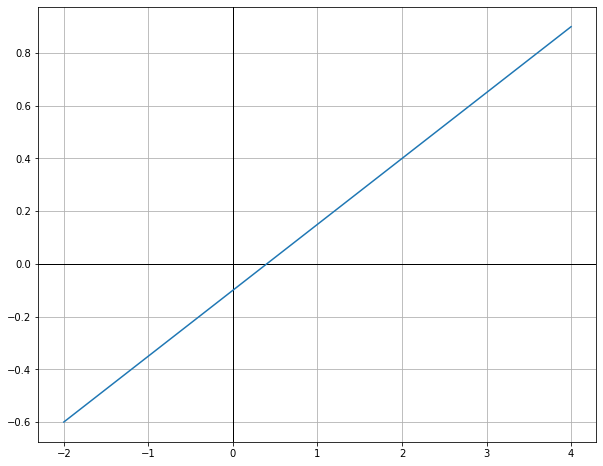

In [ ]:
def plotline(a, b, c):
  x = np.linspace(-2,4,50)
  y = (-a*x-c)/b
  plt.figure(figsize=(10,8))
  plt.axvline(0,-1,1,color='k',linewidth=1)
  plt.axhline(0,-2,4,color='k',linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)

1


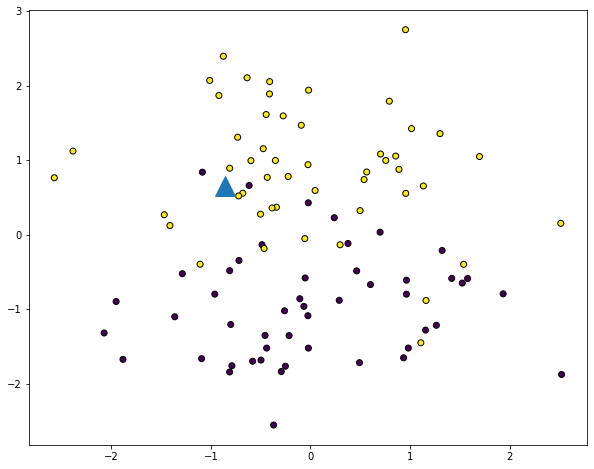

In [ ]:
np.random.seed(56)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], marker='o', c=Y, edgecolors='k')
p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)


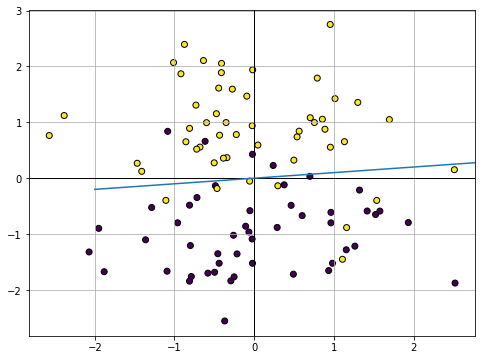

In [ ]:
def plotmodel(w1, w2, b):
  plt.figure(figsize=(8,6))
  plt.scatter(X[:,0], X[:,1], marker='o', c=Y, edgecolors='k')
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  x = np.linspace(-2,4,50)
  y = (-w1*x-b)/w2
  plt.axvline(0,-1,1,color='k',linewidth=1)
  plt.axhline(0,-2,4,color='k',linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = -5
w2 = 50
b = 0

plotmodel(w1, w2, b)

0 blue


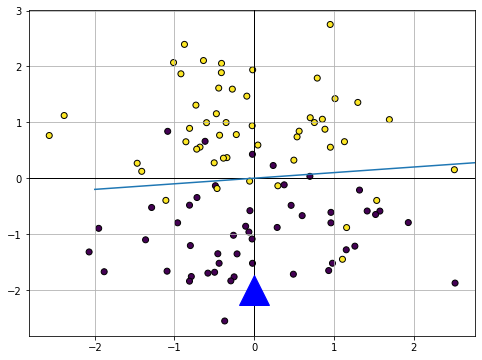

In [ ]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (0,-2)

classe, cor = classify(p, w1, w2, b)
print(classe, cor)
plotmodel(w1, w2, b)
plt.plot(p[0],p[1], marker='^', color=cor, markersize=30)

In [ ]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1

print('Acurácia: {0}'.format(100*acertos/len(X)))

Acurácia: 88.0


#Camada Lienar

In [ ]:
perceptron = nn.Linear(in_features=3, out_features=1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)

weight tensor([[-0.3126, -0.0455,  0.2772]])
bias tensor([0.4321])


In [ ]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b= perceptron.bias.data.numpy()

#w1 * x1 + w2 * x2 + w3 * x3 + b = 0 